<a href="https://colab.research.google.com/github/anjali-ojha/deep-learning/blob/main/assignment/assignment-4/part2/Anjali_Ojha_HW_4_Part2-local.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment 04 - Transfer Learning and Bounding Boxes and YOLOV8

# Part 2: Follow the steps in YOLOV8 and attach a screenshot of object detection

## Mac: https://pysource.com/2023/03/28/object-detection-with-yolo-v8-on-mac-m1/ buttery fly dataset: use ~10 images from https://universe.roboflow.com/yolo-a6y21/squid-bat-butterfly

## You can also try butterfly video and detect objects. (do not submit it)

In [1]:
!pip install ultralytics

In [2]:
from ultralytics import YOLO
import numpy as np
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy
import cv2

from IPython.display import display
from IPython.display import Image as im

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import os
HOME = os.getcwd()
print(HOME)

/Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/part2


In [4]:
def detect_objects(_model, image_path, conf):
    """
    This method will load the image and detect the
    """
    image = Image.open(image_path)
    frame = cv2.cvtColor(numpy.array(image), cv2.COLOR_RGB2BGR)
    results = _model.predict(source=image_path, conf=conf)
    result = results[0]
    print(results[0].boxes.xyxy)
    bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")
    classes = np.array(result.boxes.cls.cpu(), dtype="int")
    # class_labels = ['Bat', 'Butterfly', 'Squid']

    print(bboxes, classes)

    for cls, bbox in zip(classes, bboxes):
        (x, y, x2, y2) = bbox
        cv2.rectangle(frame, (x, y), (x2, y2), (0, 0, 225), 2)
        cv2.putText(frame, str(cls), (x, y - 5), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 225), 2)

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    image2 = Image.fromarray(frame_rgb)
    plt.figure(figsize=(8,32))
    plt.imshow(image2)
    plt.show()


In [7]:
# Load Test Image for quick validation
! rm dog.jpeg*
! wget https://media.roboflow.com/notebooks/examples/dog.jpeg

--2024-02-28 17:25:33--  https://media.roboflow.com/notebooks/examples/dog.jpeg
Resolving media.roboflow.com (media.roboflow.com)... 34.110.133.209
Connecting to media.roboflow.com (media.roboflow.com)|34.110.133.209|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 106055 (104K) [image/jpeg]
Saving to: ‘dog.jpeg’

dog.jpeg            100%[===================>] 103.57K  --.-KB/s    in 0.04s   

2024-02-28 17:25:33 (2.47 MB/s) - ‘dog.jpeg’ saved [106055/106055]




image 1/1 /Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/part2/dog.jpeg: 640x384 1 dog, 160.2ms
Speed: 1.4ms preprocess, 160.2ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 384)
tensor([[ 68.5241, 249.5817, 644.2305, 929.1172]])
[[ 68 249 644 929]] [16]


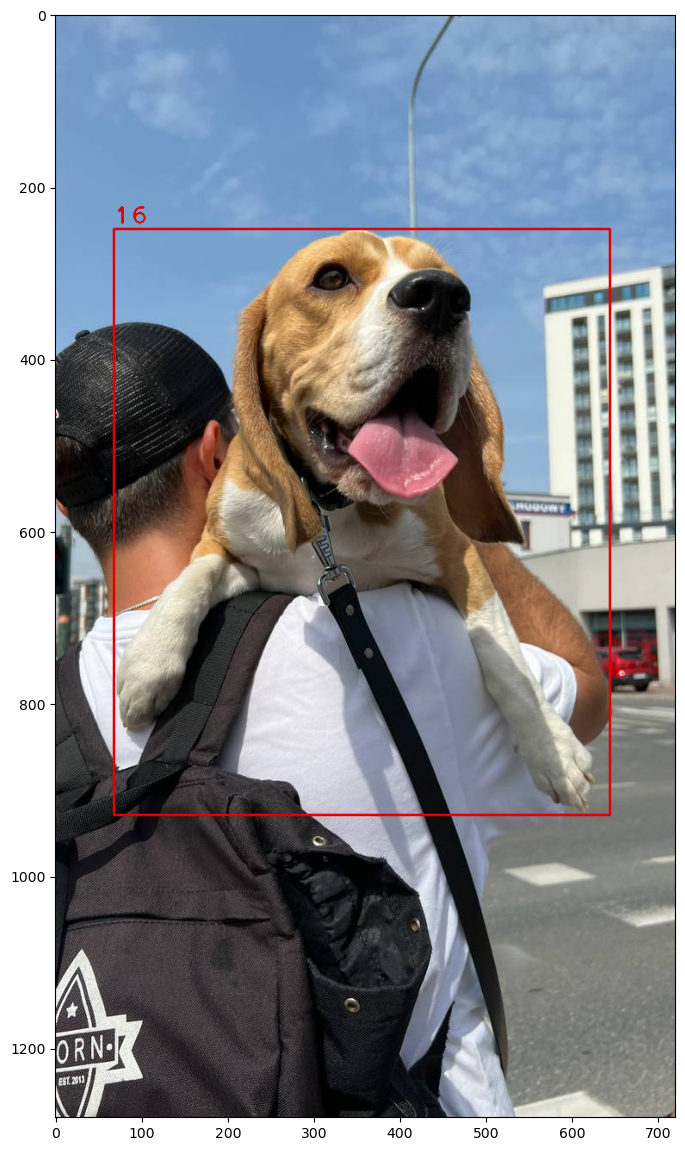

In [8]:
# Loading the ylolv8m model and testing it on a sample image.
model = YOLO("yolov8m.pt")
detect_objects(model, 'dog.jpeg', conf=0.75)

## Loading the sample dataset which created from the source https://universe.roboflow.com/yolo-a6y21/squid-bat-butterfly 

### Took the entire dataset and split it in test and validatiion. It consist of multiple images of Bats, Butterfly and Squid.

In [11]:
import os
HOME = os.getcwd()
print(HOME)

/Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/part2


In [65]:
# Loading Data From Git which was prepared from the given link

! rm -rf butterfly-mix*
! wget https://github.com/anjali-ojha/deep-learning/raw/main/assignment/assignment-4/part2/butterfly-mix.zip
! unzip butterfly-mix.zip
! ls -lrth

zsh:1: no matches found: butterfly-mix*
--2024-02-28 18:08:40--  https://github.com/anjali-ojha/deep-learning/raw/main/assignment/assignment-4/part2/butterfly-mix.zip
Resolving github.com (github.com)... 192.30.255.113
Connecting to github.com (github.com)|192.30.255.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/anjali-ojha/deep-learning/main/assignment/assignment-4/part2/butterfly-mix.zip [following]
--2024-02-28 18:08:41--  https://raw.githubusercontent.com/anjali-ojha/deep-learning/main/assignment/assignment-4/part2/butterfly-mix.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 2606:50c0:8000::154, 2606:50c0:8001::154, 2606:50c0:8002::154, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|2606:50c0:8000::154|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8589133 (8.2M) [application/zip]
Saving to: ‘butterfly-mix.zip’

butterfly-mix.zip   100%[

  inflating: butterfly-mix/datasets/train/images/59_jpg.rf.16d1ff74b16c83326a523ceb928e2ebc.jpg  
  inflating: butterfly-mix/datasets/train/images/31_jpg.rf.2b2fec76ccca4a6243c630f24eac5c41.jpg  
  inflating: butterfly-mix/datasets/train/images/60_jpg.rf.f359317519c84103cf7bde7b311fbad2.jpg  
  inflating: butterfly-mix/datasets/train/images/01_jpg.rf.28abb439874a51775e1aa43db4868b56.jpg  
  inflating: butterfly-mix/datasets/train/images/05_jpg.rf.aec626c4cfb801a345ef28748a935013.jpg  
  inflating: butterfly-mix/datasets/train/images/10_jpg.rf.2ac6e960e7c9b24df886805d273a89d3.jpg  
  inflating: butterfly-mix/datasets/train/images/03_jpg.rf.107555616f2afe83e5bfa49995300dd6.jpg  
  inflating: butterfly-mix/datasets/train/images/54_jpg.rf.d8bf72081286b342e575cdb0e0b468d7.jpg  
  inflating: butterfly-mix/datasets/train/images/55_jpg.rf.6c214c58ba889894ba548f5ae22e3a9d.jpg  
  inflating: butterfly-mix/datasets/train/images/01_jpg.rf.c8e5235634922823096ea135138c7d7f.jpg  
  inflating: butterf

total 136888
-rw-r--r--  1 hims  staff   104K Jun  2  2023 dog.jpeg
drwxr-xr-x  4 hims  staff   128B Feb 28 02:43 butterfly-mix
-rw-r--r--  1 hims  staff    50M Feb 28 17:24 yolov8m.pt
-rw-r--r--  1 hims  staff   6.2M Feb 28 17:34 yolov8n.pt
drwxr-xr-x  3 hims  staff    96B Feb 28 18:00 runs
-rw-r--r--  1 hims  staff   2.6M Feb 28 18:08 Anjali_Ojha_HW_4_Part2.ipynb
-rw-r--r--  1 hims  staff   8.2M Feb 28 18:08 butterfly-mix.zip
drwxr-xr-x  3 hims  staff    96B Feb 28 18:08 __MACOSX


In [97]:
%%bash
rm -rf runs/*
ls -lrt
path='/Users/hims/sjsu/sem-3/git/deep-learning/assignment/assignment-4/part2'
yolo mode=train task=detect model=yolov8n.pt data=$path/butterfly-mix/datasets/data.yaml epochs=10 imgsz=640 plots=True


total 122640
-rw-r--r--  1 hims  staff    106055 Jun  2  2023 dog.jpeg
drwxr-xr-x  4 hims  staff       128 Feb 28 02:43 butterfly-mix
-rw-r--r--  1 hims  staff  52117635 Feb 28 17:24 yolov8m.pt
-rw-r--r--  1 hims  staff   6534387 Feb 28 17:34 yolov8n.pt
-rw-r--r--  1 hims  staff   4023675 Feb 28 19:16 Anjali_Ojha_HW_4_Part2.ipynb
drwxr-xr-x  2 hims  staff        64 Feb 28 19:17 runs
New https://pypi.org/project/ultralytics/8.1.19 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.18 🚀 Python-3.10.13 torch-2.2.0 CPU (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/hims/sjsu/sem-3/git/deep-learning/assignment/assignment-4/part2/butterfly-mix/datasets/data.yaml, epochs=10, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_

train: Scanning /Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/part2/butterfly-mix/datasets/train/labels.cache... 93 images, 0 backgrounds, 0 corrupt: 100%|██████████| 93/93 [00:00<?, ?it/s]
val: Scanning /Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/part2/butterfly-mix/datasets/valid/labels.cache... 13 images, 0 backgrounds, 0 corrupt: 100%|██████████| 13/13 [00:00<?, ?it/s]


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train
Starting training for 10 epochs...
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/10         0G      1.426      3.958       2.01         14        640: 100%|██████████| 6/6 [00:42<00:00,  7.16s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.30s/it]


                   all         13         13    0.00337          1      0.131     0.0618

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/10         0G      1.014      3.398      1.701         17        640: 100%|██████████| 6/6 [00:43<00:00,  7.21s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.29s/it]


                   all         13         13    0.00335          1       0.57      0.286

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/10         0G     0.9263      2.915      1.579         17        640: 100%|██████████| 6/6 [00:42<00:00,  7.09s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.26s/it]


                   all         13         13    0.00339          1      0.601      0.388

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/10         0G     0.8849      2.541      1.537         17        640: 100%|██████████| 6/6 [00:41<00:00,  6.96s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


                   all         13         13    0.00378          1      0.576      0.358

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/10         0G     0.8089      2.296      1.495         22        640: 100%|██████████| 6/6 [00:41<00:00,  6.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.14s/it]


                   all         13         13    0.00402          1       0.69      0.493

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/10         0G     0.8956      2.146      1.528         19        640: 100%|██████████| 6/6 [00:41<00:00,  7.00s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.21s/it]


                   all         13         13     0.0043          1      0.836      0.575

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/10         0G     0.7674      1.978      1.421         17        640: 100%|██████████| 6/6 [00:39<00:00,  6.67s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.13s/it]


                   all         13         13    0.00475          1      0.851      0.541

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/10         0G     0.7266       1.88       1.35         27        640: 100%|██████████| 6/6 [00:39<00:00,  6.61s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.18s/it]


                   all         13         13      0.215          1      0.884      0.602

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/10         0G      0.708      1.723      1.307         18        640: 100%|██████████| 6/6 [00:44<00:00,  7.47s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.27s/it]


                   all         13         13      0.667      0.398      0.884      0.687

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/10         0G     0.6816      1.635      1.271         20        640: 100%|██████████| 6/6 [00:45<00:00,  7.56s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.24s/it]


                   all         13         13      0.771      0.709      0.912      0.754

10 epochs completed in 0.123 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 6.2MB
Optimizer stripped from runs/detect/train/weights/best.pt, 6.2MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.1.18 🚀 Python-3.10.13 torch-2.2.0 CPU (Apple M1 Pro)
Model summary (fused): 168 layers, 3006233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:01<00:00,  1.23s/it]


                   all         13         13      0.771      0.709      0.912      0.754
                   Bat         13          4      0.393       0.34      0.745      0.621
             Butterfly         13          5          1      0.787      0.995      0.796
                 Squid         13          4      0.919          1      0.995      0.846
Speed: 1.6ms preprocess, 76.2ms inference, 0.0ms loss, 13.0ms postprocess per image
Results saved to runs/detect/train
💡 Learn more at https://docs.ultralytics.com/modes/train


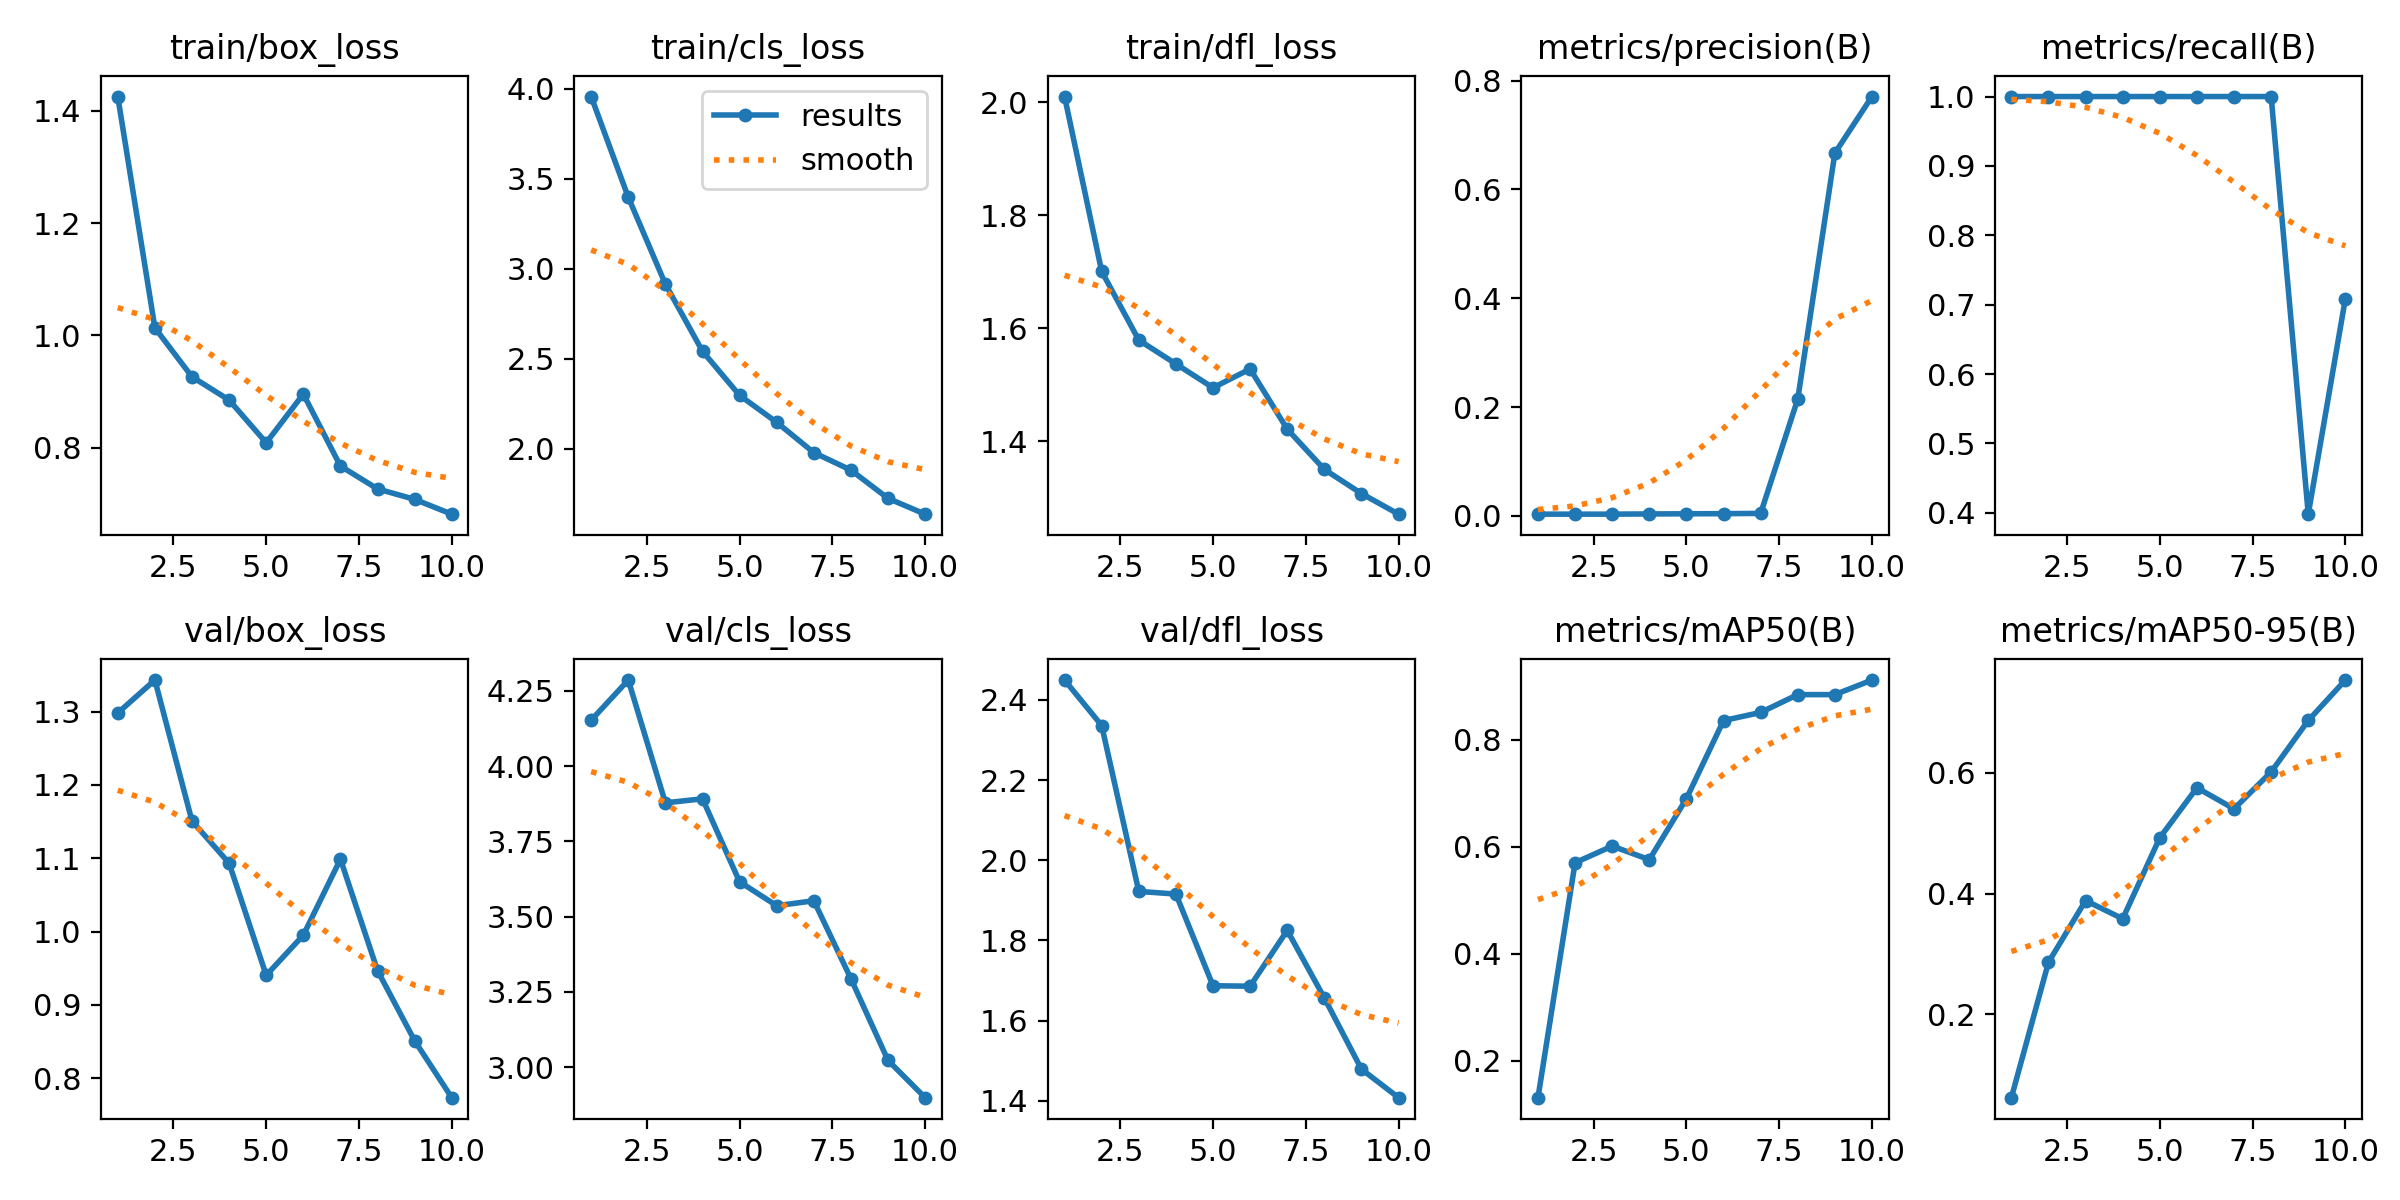

In [98]:
im(filename='runs/detect/train/results.png', width=900)

In [105]:
def detect_objects(_model, image_path, conf):
    """
    This method will load the image and detect the
    """
    image = Image.open(image_path)
    frame = cv2.cvtColor(numpy.array(image), cv2.COLOR_RGB2BGR)
    results = _model.predict(source=image_path, conf=conf)
    result = results[0]
    
    bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")
    classes = np.array(result.boxes.cls.cpu(), dtype="int")
    class_labels = ['Bat', 'Butterfly', 'Squid']

    print(bboxes, classes)

    for cls, bbox in zip(classes, bboxes):
        (x, y, x2, y2) = bbox
        cv2.rectangle(frame, (x, y), (x2, y2), (0, 0, 225), 2)
        cv2.putText(frame, str(class_labels[cls]), (x, y - 5), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 225), 2)

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    image2 = Image.fromarray(frame_rgb)
    plt.figure(figsize=(8,32))
    plt.imshow(image2)
    plt.show()


In [90]:
new_model = YOLO('runs/detect/train/weights/best.pt')
detect_objects(new_model, 
               image_path = 'butterfly-mix/datasets/test/images/11_jpg.rf.f6ba886248d16e5d94a21da899d988a7.jpg', 
               conf = 0.007)



FileNotFoundError: [Errno 2] No such file or directory: 'butterfly-mix/datasets/test/images/11_jpg.rf.f6ba886248d16e5d94a21da899d988a7.jpg'

.DS_Store
01_jpg.rf.c8e5235634922823096ea135138c7d7f.jpg

image 1/1 /Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/part2/butterfly-mix/datasets/test/images/01_jpg.rf.c8e5235634922823096ea135138c7d7f.jpg: 640x640 1 Squid, 84.7ms
Speed: 4.1ms preprocess, 84.7ms inference, 0.6ms postprocess per image at shape (1, 3, 640, 640)
[[117   0 369 374]] [2]


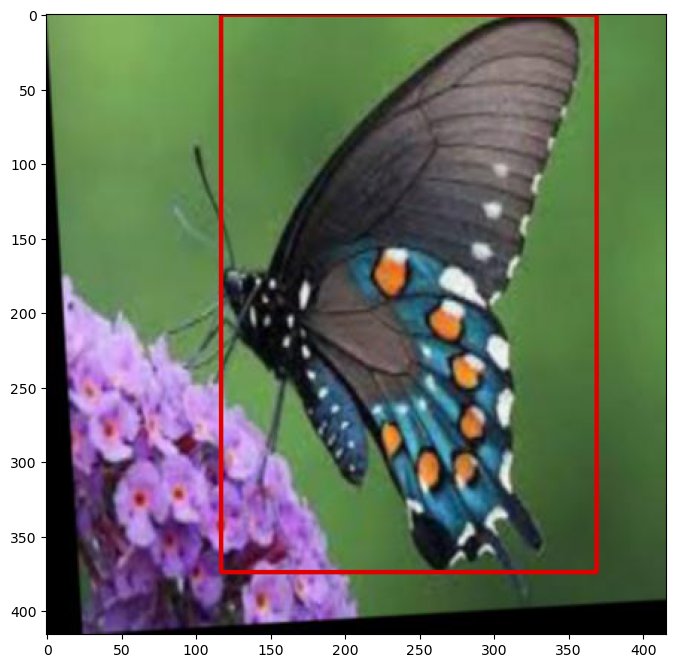

02_jpg.rf.d2830ef286eb4571acb72540cd1b41b9.jpg

image 1/1 /Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/part2/butterfly-mix/datasets/test/images/02_jpg.rf.d2830ef286eb4571acb72540cd1b41b9.jpg: 640x640 1 Squid, 95.4ms
Speed: 2.4ms preprocess, 95.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
[[ 35  29 298 270]] [2]


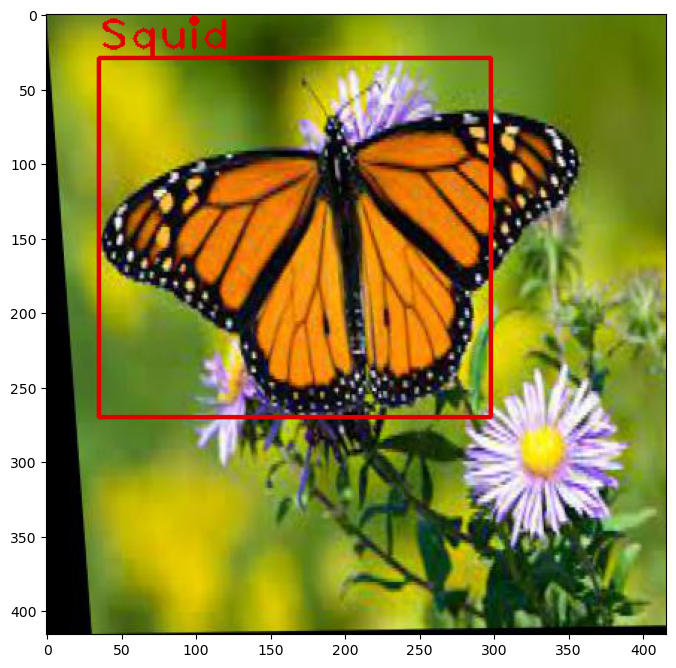

03_jpg.rf.daaf455c280f3e4c03f623dd456c3225.jpg

image 1/1 /Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/part2/butterfly-mix/datasets/test/images/03_jpg.rf.daaf455c280f3e4c03f623dd456c3225.jpg: 640x640 1 Squid, 101.8ms
Speed: 2.7ms preprocess, 101.8ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
[[106  46 413 342]] [2]


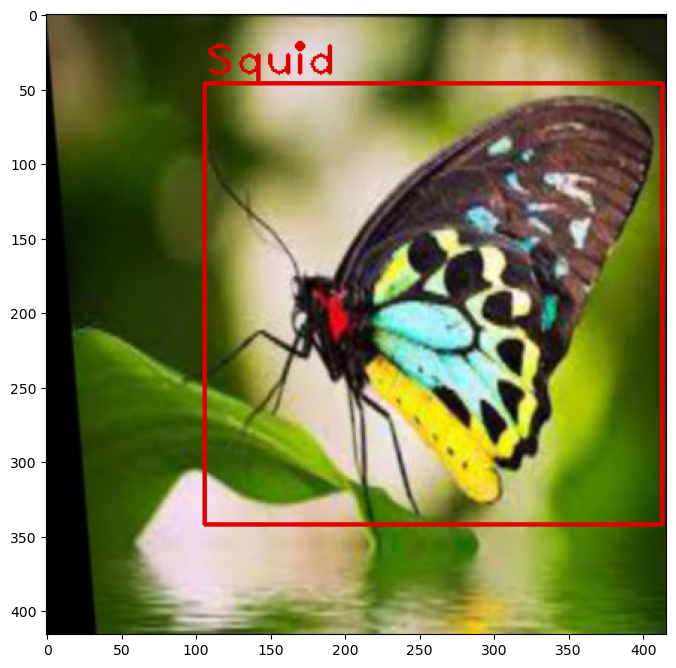

In [106]:
import os 

for filename in sorted(os.listdir('butterfly-mix/datasets/test/images/')):
    print(filename)
    if filename.startswith("."): continue
    detect_objects(new_model, 
               image_path = f'butterfly-mix/datasets/test/images/{filename}', 
               conf = 0.007)

In [79]:
new_model2 = YOLO('yolov8n.pt')  # load a pretrained YOLOv8n detection model
new_model2.train(
    data='/Users/hims/sjsu/sem-3/git/deep-learning/assignment/assignment-4/part2/butterfly-mix/datasets/data.yaml', 
    epochs=4
)


New https://pypi.org/project/ultralytics/8.1.19 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.18 🚀 Python-3.10.13 torch-2.2.0 CPU (Apple M1 Pro)
engine/trainer: task=detect, mode=train, model=yolov8n.pt, data=/Users/hims/sjsu/sem-3/git/deep-learning/assignment/assignment-4/part2/butterfly-mix/datasets/data.yaml, epochs=4, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train4, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, cla

train: Scanning /Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/part2/butte
val: Scanning /Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/part2/butterf

Plotting labels to runs/detect/train4/labels.jpg... 


optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001429, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
TensorBoard: model graph visualization added ✅
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs/detect/train4
Starting training for 4 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/4         0G      1.247      3.234      1.699         50        640:  33%|███▎      | 2/6 [00:22<00:45, 11.34s/it]


KeyboardInterrupt: 


image 1/1 /Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/part2/butterfly-mix/datasets/test/images/11_jpg.rf.f6ba886248d16e5d94a21da899d988a7.jpg: 640x640 1 Butterfly, 92.4ms
Speed: 7.2ms preprocess, 92.4ms inference, 0.4ms postprocess per image at shape (1, 3, 640, 640)
[[ 80  20 211 360]] [1]


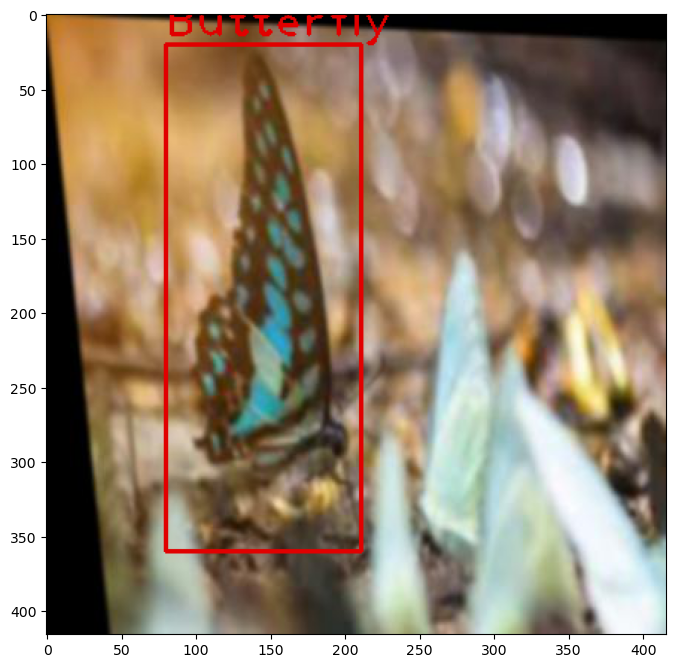

In [51]:
detect_objects(new_model2, 
               image_path = 'butterfly-mix/datasets/test/images/11_jpg.rf.f6ba886248d16e5d94a21da899d988a7.jpg', 
               conf = 0.007)


In [ ]:
# Working dog
from ultralytics import YOLO
import numpy as np
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np

import cv2

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

model = YOLO("yolov8m.pt")

# Define the function to perform detection on an image
def detect_objects(image_path):

    # Load the image
    image = Image.open(image_path)
    frame = cv2.cvtColor(numpy.array(image), cv2.COLOR_RGB2BGR)

    results = model(frame, device="mps")
    result = results[0]
    bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")
    classes = np.array(result.boxes.cls.cpu(), dtype="int")
    for cls, bbox in zip(classes, bboxes):
        (x, y, x2, y2) = bbox
        cv2.rectangle(frame, (x, y), (x2, y2), (0, 0, 225), 2)
        cv2.putText(frame, str(cls), (x, y - 5), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 225), 2)

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    image2 = Image.fromarray(frame_rgb)
    plt.figure(figsize=(24,32))
    plt.imshow(image2)
    plt.show()

# detect_objects('/Users/hims/Downloads/Squid Bat Butterfly.v2i.yolov8/train/images/01_jpg.rf.28abb439874a51775e1aa43db4868b56.jpg')
detect_objects('/Users/hims/Downloads/YOLO-v8-on-mac-m1/dog.png')

# cv2.destroyAllWindows()


In [ ]:
%%bash
ls -lrt
yolo mode=train task=detect model=yolov8n.pt data=/Users/hims/sjsu/sem-3/git/deep-learning/assignment/assignment-4/datasets/data.yaml epochs=3 imgsz=640 plots=True


In [ ]:
model2 = YOLO('/Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/runs/detect/train8/weights/last.pt')
model2


In [ ]:
import numpy

# Working dog
from ultralytics import YOLO
import numpy as np
from PIL import Image
import cv2
from ultralytics import YOLO
import numpy as np

import cv2

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# model = YOLO('yolov8n-seg.pt')  # load a pretrained YOLOv8n segmentation model

# Define the function to perform detection on an image
def detect_objects(_model, image_path):
    # Load the image
    image = Image.open(image_path)
    frame = cv2.cvtColor(numpy.array(image), cv2.COLOR_RGB2BGR)

#     results = _model(frame, device="mps")

    results = _model.predict(source=image_path, conf=0.0055)
    result = results[0]
    print(results[0].boxes.xyxy)
    bboxes = np.array(result.boxes.xyxy.cpu(), dtype="int")
    classes = np.array(result.boxes.cls.cpu(), dtype="int")
    print(bboxes, classes)
    for cls, bbox in zip(classes, bboxes):
        (x, y, x2, y2) = bbox
        cv2.rectangle(frame, (x, y), (x2, y2), (0, 0, 225), 2)
        cv2.putText(frame, str("butterfly"), (x, y - 5), cv2.FONT_HERSHEY_PLAIN, 2, (0, 0, 225), 2)

    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)

    # Convert the frame to an image
    image2 = Image.fromarray(frame_rgb)
#     image2.show()
    plt.figure(figsize=(24,32))
    plt.imshow(image2)
    plt.show()

#     cv2.imshow("Img", frame)
#     cv2.waitKey(1)

detect_objects(model2, '/Users/hims/Library/CloudStorage/GoogleDrive-anjalihimanshuojha@gmail.com/Other computers/My MacBook Air/sjsu/sem-3/git/deep-learning/assignment/assignment-4/datasets/valid/images/10_jpg.rf.2ac6e960e7c9b24df886805d273a89d3.jpg')


In [ ]:
%%bash
cd /Users/hims/sjsu/sem-3/git/deep-learning/assignment/assignment-4/datasets

pwd
yolo task=detect mode=predict model=/Users/hims/sjsu/sem-3/git/deep-learning/assignment/assignment-4/runs/detect/train8/weights/best.pt conf=0.005 source=test/images

